In [1]:
from newspaper import Article

# 파싱할 뉴스 기사 주소
url = 'https://n.news.naver.com/mnews/article/029/0002766294?sid=104'

# 언어가 한국어이므로 language='ko'로 설정
article = Article(url, language='ko')
article.download()
article.parse()

In [2]:
print('기사 제목 :')
print(article.title)
print('')

print('기사 내용 :')
print(article.text)

기사 제목 :
트위터서 밤새며 일하는 머스크 "테슬라 일도 한다"

기사 내용 :
소셜미디어 트위터를 인수한 테슬라 최고경영자(CEO) 일론 머스크가 트위터 업무에 집중해 테슬라 경영을 소홀히 한다는 지적을 의식한 듯 "트위터 일과 함께 테슬라 업무도 봤다"는 트윗을 올렸다. 그러면서 "이번주 중 테슬라 업무도 챙겨보겠다"고 밝혔다.14일(현지시간) 블룸버그통신에 따르면 머스크는 자신을 고문하듯 일주일 내내 트위터 업무를 하고 있다고 말했다. 인도네시아 발리에서 주요 20개국 정상회의(G20)와 함께 진행된 기업인 회의인 비즈니스20 서밋(B20)에 화상으로 참석해서 한 말이다.머스크는 "내가 처리해야 할 일이 너무 많다. 할 수 있는 한 최대한 일을 하고 있다"면서 "아침부터 저녁까지 일주일에 7일을 일한다. 솔직히 말해 나 자신을 고문하는 정도는 극단적인 수준"이라고 밝혔다.그는 B20 회의 이후에는 트위터에 글을 올려 트위터 본사에서 밤을 샜고 조직이 고쳐질 때까지 회사에서 일하고 잠잘 것이라고 밝혔다. 한편 머스크가 트위터를 인수한 후 회사 내부에서는 '직원들을 24시간 일하는 로봇으로 취급한다'는 등의 비판이 쏟아지고 있다.


In [3]:
# 크롤러를 만들기 전 필요한 도구들을 임포트
import requests
import pandas as pd
from bs4 import BeautifulSoup

# 매개변수는 페이지 수, 카테고리, 날짜
def make_urllist(page_num, code1, code2, date): 
  urllist= []
  for i in range(1, page_num + 1):
    url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm'+'&sid2='+str(code2)+'&sid1='+str(code1)+'&date='+str(date)+'&page='+str(i)
    headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.90 Safari/537.36'}
    news = requests.get(url, headers=headers)

    # BeautifulSoup의 인스턴스 생성 / 파서는 html.parser를 사용
    soup = BeautifulSoup(news.content, 'html.parser')

    news_list = soup.select('.newsflash_body .type06_headline li dl')
 
    news_list.extend(soup.select('.newsflash_body .type06 li dl'))
        
    # 각 뉴스로부터 a 태그인 <a href ='주소'> 에서 '주소'만을 가져옴.
    for line in news_list:
        urllist.append(line.a.get('href'))
  return urllist

In [4]:
url_list = make_urllist(2, 105, 283, 20221111)
print('뉴스 기사의 개수: ',len(url_list))
url_list

뉴스 기사의 개수:  40


['https://n.news.naver.com/mnews/article/138/0002136646?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002273456?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002273455?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002273446?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002273444?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002273443?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002273437?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002273436?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002273431?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002273427?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002273425?sid=105',
 'https://n.news.naver.com/mnews/article/031/0000709823?sid=105',
 'https://n.news.naver.com/mnews/article/138/0002136641?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002273421?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002273420?sid=105',
 'https://

In [5]:
url_list[:5]

['https://n.news.naver.com/mnews/article/138/0002136646?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002273456?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002273455?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002273446?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002273444?sid=105']

In [6]:
idx2word = {'101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}
idx2word2 = {'731' : '모바일', '226' : '인터넷/SNS', '227' : '통신/뉴미디어', '230' : 'IT 일반', '732' : '보안/해킹', '283' : '컴퓨터'}

In [7]:
from newspaper import Article

# 데이터프레임을 생성하는 함수
def make_data(urllist, code1, code2):
  text_list = []
  for url in urllist:
    article = Article(url, language='ko')
    article.download()
    article.parse()
    text_list.append(article.text)

  # 데이터프레임의 'news' 키 아래 파싱한 텍스트를 밸류로 붙여줌.
  df = pd.DataFrame({'news': text_list})

  #- 데이터프레임의 'code' 키 아래 한글 카테고리명을 붙여줌.
  df['code1'] = idx2word[str(code1)]
  df['code2'] = idx2word2[str(code2)]
  return df

In [8]:
data = make_data(url_list, 105, 283)
data[:10]

,news,code1,code2
0,[디지털데일리 이종현기자] 한글과컴퓨터(이하 한컴)이 사업 포트폴리오 개편의 효과를...,IT/과학,컴퓨터
1,업스테이지 이활석 CTO\n\n업스테이지 이활석 CTO는 11일 개최된 '노코드/로...,IT/과학,컴퓨터
2,권남혁 인터랙트 대표가 '노코드·로우코드 자동화 컨퍼런스 2022'에서 'XR 교육...,IT/과학,컴퓨터
3,조남승 퀸텟시스템즈 부사장\n\n“요즘 인력이 부족해 사업을 못하는 것이 현실이다....,IT/과학,컴퓨터
4,"박종근 비컴유니버스 상무\n\n“장기화된 경기 침체와 공급망 마비, 인력난, 인건비...",IT/과학,컴퓨터
5,"임현길 STEG 대표\n\n""노코드 플랫폼으로 A부터 Z까지 모든 것을 개발하라는 ...",IT/과학,컴퓨터
6,안랩이 11월 11일 농업인의 날을 맞아 사내 식당에서 진행한 ‘안랩 가래떡 데이’...,IT/과학,컴퓨터
7,아크로니스 어드밴스드 시큐리티 EDR.\n\n아크로니스는 지난 7일부터 9일까지 3...,IT/과학,컴퓨터
8,전년 대비 월별 미국 온라인 물가 변화. 어도비 디지털 물가 지수(DPI) 및 소비...,IT/과학,컴퓨터
9,"한글과컴퓨터 CI\n\n한글과컴퓨터(한컴)는 3분기 연결 기준 매출액 548억원, ...",IT/과학,컴퓨터


In [9]:
code_list = [[102,250], [103,243], [105,283]]
idx2word2 = {'731' : '모바일', '226' : '인터넷/SNS', '227' : '통신/뉴미디어', '230' : 'IT 일반', '732' : '보안/해킹', '283' : '컴퓨터', '250' : '교육', '243' : '책'}

[[102, 250], [103, 243], [105, 283]]

In [10]:
from multiprocessing import Pool
import random
import time, os

def make_total_data(page_num, code_list, date):
  start = int(time.time())  
  num_cores = 4  
  df = None
  for code1, code2 in code_list:
    pool = Pool(num_cores)
    url_list = make_urllist(page_num, code1, code2, date)
    df_temp = make_data(url_list, code1, code2)
    print(str(code1)+'번:'+str(code2)+'번'+' 코드에 대한 데이터를 만들었습니다.')
    pool.close()
    pool.join()
    time.sleep(random.randint(0,1))
    if df is not None:
      df = pd.concat([df, df_temp])
    else:
      df = df_temp

  print("***run time(sec) :", int(time.time()) - start)
  return df

In [11]:
df = make_total_data(1, code_list, 20221111)

102번:250번 코드에 대한 데이터를 만들었습니다.
103번:243번 코드에 대한 데이터를 만들었습니다.
105번:283번 코드에 대한 데이터를 만들었습니다.
***run time(sec) : 28


In [12]:
print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  60


In [13]:
df.sample(10)

,news,code1,code2
6,예일대 교수이자 수학자인 마이클 프레임이 상실 속에 살아가는 우리에게 수학이 어떤 ...,생활/문화,책
7,모두에게 보여주고 싶은 기사라면?beta 이 기사를 추천합니다 버튼을 눌러주세요.\...,사회,교육
1,채식 급식이 제대로 운영되지 않고 있다는 시민모임 주장에 대해 제주자치도교육청이 해...,사회,교육
17,[구미=뉴시스] 박홍식 기자 = 구미대학교 간호학과 예비 간호사들이 11일 교내 긍...,사회,교육
2,내년도 교육부의 예산안이 국회 교육위원회 전체회의 상정의 문턱을 넘지 못했다.국회 ...,사회,교육
11,세계 최고의 레스토랑은 어떤 곳일까. 사람들은 왜 그곳을 ‘세계 최고’라고 부르는 ...,생활/문화,책
11,이태원 핼러윈 참사 이후 1만 명이 넘는 초·중·고 학생이 심리상담을 받은 것으로 ...,사회,교육
2,자본주의 사회에서 돈 없이 생존할 수 있을까. <0원으로 사는 삶>은 ‘무소비’에 ...,생활/문화,책
9,서울의 한 대학 교수 A씨는 2013년부터 약 4년간 연구용역과제를 수행하며 연구에...,사회,교육
19,[구미=뉴시스] 박홍식 기자 = 구미대학교 간호학과 예비 간호사들이 11일 교내 긍...,사회,교육


In [15]:
# 대량 크롤링 진행
df = make_total_data(10, code_list, 20221111)

102번:250번 코드에 대한 데이터를 만들었습니다.
103번:243번 코드에 대한 데이터를 만들었습니다.
105번:283번 코드에 대한 데이터를 만들었습니다.
***run time(sec) : 287


In [17]:
import os

# 데이터프레임 파일을 csv 파일로 저장
csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data.csv"
df.to_csv(csv_path, index=False)

if os.path.exists(csv_path):
  print('{} File Saved!'.format(csv_path))

/aiffel/aiffel/news_crawler/news_data.csv File Saved!


In [18]:
csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data.csv"
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code1,code2
0,핼러윈 이태원 참사 관련해 “美문화 주입받아 발생한 일”\n\n강원도 한 고교에서 ...,사회,교육
1,채식 급식이 제대로 운영되지 않고 있다는 시민모임 주장에 대해 제주자치도교육청이 해...,사회,교육
2,내년도 교육부의 예산안이 국회 교육위원회 전체회의 상정의 문턱을 넘지 못했다.국회 ...,사회,교육
3,2023학년도 대학수학능력시험을 맞아 경찰이 특별 교통 관리에 나섭니다.제주경찰청은...,사회,교육
4,이주호 사회부총리 겸 교육부 장관이 “교육부가 이태원 참사로 희생된 교사의 숫자를 ...,사회,교육


In [19]:
# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)
df['news']

0     핼러윈 이태원 참사 관련해 문화 주입받아 발생한 일강원도 한 고교에서 교사가 수업 ...
1     채식 급식이 제대로 운영되지 않고 있다는 시민모임 주장에 대해 제주자치도교육청이 해...
2     내년도 교육부의 예산안이 국회 교육위원회 전체회의 상정의 문턱을 넘지 못했다국회 교...
3     학년도 대학수학능력시험을 맞아 경찰이 특별 교통 관리에 나섭니다제주경찰청은 오는 일...
4     이주호 사회부총리 겸 교육부 장관이 교육부가 이태원 참사로 희생된 교사의 숫자를 공...
5     모두에게 보여주고 싶은 기사라면 이 기사를 추천합니다 버튼을 눌러주세요집계 기간 동...
6     모두에게 보여주고 싶은 기사라면 이 기사를 추천합니다 버튼을 눌러주세요집계 기간 동...
7     모두에게 보여주고 싶은 기사라면 이 기사를 추천합니다 버튼을 눌러주세요집계 기간 동...
8     서울시 재난안전 관련 업무를 담당했던 안전지원과 소속 공무원이 일 자택에서 숨진 채...
9     서울의 한 대학 교수 씨는 년부터 약 년간 연구용역과제를 수행하며 연구에 참여하지 ...
10    빨간 넥타이 지적에 거기까지 생각 못 미쳐고등교육 특별회계 합의점 못 찾아이주호 사...
11    이태원 핼러윈 참사 이후 만 명이 넘는 초중고 학생이 심리상담을 받은 것으로 나타났...
12    구미뉴시스 박홍식 기자  신경림 대한간호협회장이 일 구미대학교 긍지관에서 열린 제회...
13    구미뉴시스 박홍식 기자  구미대학교 간호학과 예비 간호사들이 일 교내 긍지관에서 나...
14    구미뉴시스 구미뉴시스 박홍식 기자  구미대학교 간호대학 학년 명의 예비 간호사들이 ...
15    모두에게 보여주고 싶은 기사라면 이 기사를 추천합니다 버튼을 눌러주세요집계 기간 동...
16    구미뉴시스 박홍식 기자  구미대학교 간호학과 예비 간호사들이 일 교내 긍지관에서 나...
17    구미뉴시스 박홍식 기자  구미대학교 간호학과 예비 간호사들이 일 교내 긍지관

In [20]:
print(df.isnull().sum())

news     0
code1    0
code2    0
dtype: int64


In [21]:
# 중복된 샘플들을 제거
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  57


<AxesSubplot:>

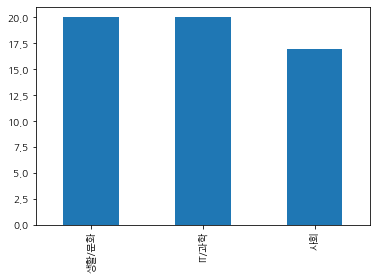

In [22]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "NanumGothic"

df['code1'].value_counts().plot(kind = 'bar')

In [23]:
print(df.groupby('code1').size().reset_index(name = 'count'))

   code1  count
0  IT/과학     20
1     사회     17
2  생활/문화     20


In [24]:
from konlpy.tag import Mecab
tokenizer = Mecab()

kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

# 형태소 분석 (토큰화)
print(tokenizer.morphs(kor_text))

['밤', '에', '귀가', '하', '던', '여성', '에게', '범죄', '를', '시도', '한', '대', '남성', '이', '구속', '됐', '다', '서울', '제주', '경찰서', '는', '상해', '혐의', '로', '씨', '를', '구속', '해', '수사', '하', '고', '있', '다고', '일', '밝혔', '다', '씨', '는', '지난달', '일', '피해', '여성', '을', '인근', '지하철', '역', '에서부터', '따라가', '폭행', '을', '시도', '하', '려다가', '도망간', '혐의', '를', '받', '는다', '피해', '여성', '이', '저항', '하', '자', '놀란', '씨', '는', '도망갔으며', '신고', '를', '받', '고', '주변', '을', '수색', '하', '던', '경찰', '에', '체포', '됐', '다', '피해', '여성', '은', '이', '과정', '에서', '경미', '한', '부상', '을', '입', '은', '것', '으로', '전해졌', '다']


In [25]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

In [26]:
# 토큰화 과정에서 불용어를 제거하는 함수 정의
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    
    # 토큰화
    temp_data = tokenizer.morphs(sentence) 
    
    # 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [37]:
text_data = preprocessing(df['news'])
print(text_data[2])

내년도 교육부 예산안 국회 교육 위원회 전체 회의 상정 문턱 넘 지 못했 국회 교육위 일 전체 회의 를 열 고 소관 예산안 심의 예정 었 으나 고등 평생 교육 지원 특별회계 대한 세출 세부 내역 없 다는 야당 의원 지적 으로 이날 상정 이뤄지지 않 았 더불 어 민주당 서동용 의원 현재 국회 제출 된 내년도 예산안 교육부 추진 고등 평생 교육 지원 특별회계 반영 되 지 않 예산안 라며 교육부 와 기획 재정부 노골 적 으로 국회 고유 권한 인 예산 권 무시 행태 를 보이 고 다고 말 다이어 윤석열 정부 고등 평생 교육 지원 특별회계 를 추진 겠 다고 발표 한지 개월 지났 그러나 교육부 지금 까지 단 번 도 국회 와 예산안 편성 관련 해 논의 조차 지 않 았 다면서 현재 제출 된 교육부 내년도 예산 심사 한다면 교육위 실체 도 없 유령 예산안 심사 의결 꼴 라고 꼬집 었 강민정 민주당 의원 도 어제 예결 위원 자격 으로 추경호 기재 부 장관 질의 더니 추 장관 도 고등 평생 교육 지원 특별회계 관련 제정 안 예산 부수 법안 으로 처리 려 지만 법안 내용 성안 안 돼 다고 말 헀 다면서 개 시도 교육감 기재 부나 교육부 와 관련 협의 적 도 없 고 국회 교육 위원 도 사전 의견 수렴 절차 없 었 이건 국회법 국가 재정법 위반 것 라고 지적 여당 간사인 이태규 국민 힘 의원 고등 평생 지원 특별회계 법 재정법 라서 공청회 를 통해야 한다 면서 법 안 돼 음 도 세출 예산 가져왔 다고 지만 법안 통과 와 맞물려 같이 논의 고 편성 대해 특별 사항 면 예산 통과 시 부대 사항 명기 해 탄력 적 으로 논의 고 심사 가능 다며 국회 예산 심의 권한 침해 것 라고 보 긴 어렵 다고 말 유기홍 위원장 고등 평생 교육 지원 특별회계 법 아직 교육 위원회 상정 도 안 돼 그런데 교육부 기재 부 관료 법 상임위 를 거치 지 않 고 예산 부수 법안 으로 갈 것 라고 기정사실 화 면서 일 추진 고 다면서 예산 부수 법안 으로 올라갈 사안 인지 도 교육위 에서 논의 된 바 없 다고 그러 면

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [39]:
# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code1'], random_state = 0)

In [40]:
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

훈련용 뉴스 기사의 개수 : 42
테스트용 뉴스 기사의 개수 :  15
훈련용 레이블의 개수 :  42
테스트용 레이블의 개수 :  15


In [41]:
# 단어의 수를 카운트하는 사이킷런의 카운트 벡터라이저
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

# 카운트 벡터라이저의 결과로부터 TF-IDF 결과를 얻음.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# 나이브 베이즈 분류기를 수행
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [42]:
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

In [43]:
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['IT/과학']


In [44]:
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))

['생활/문화']


In [45]:
new_sent = preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['IT/과학']


In [46]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.67      1.00      0.80         4
          사회       1.00      1.00      1.00         4
       생활/문화       1.00      0.71      0.83         7

    accuracy                           0.87        15
   macro avg       0.89      0.90      0.88        15
weighted avg       0.91      0.87      0.87        15

